In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re

matplotlib.use('cairo')

In [2]:
size = 15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,10),
          'axes.labelsize': 25,
          'axes.titlesize': 25,
          'xtick.labelsize': size*1.25,
          'ytick.labelsize': size*1.25,
          'axes.titlepad': 25}
plt.rcParams['font.sans-serif'] = ['Avenir', 'sans-serif']
plt.rcParams.update(params)

# Exploratory data analysis 

## Medical text dataset

In [3]:
DATA_TRAIN = '../data/medical-text/train.dat'
DATA_TEST = '../data/medical-text/test.dat'

## TRAIN DATA

In [4]:
comments = open(DATA_TRAIN, 'rb').readlines()

In [5]:
def split_tab(comment):
    return comment.decode(encoding='utf-8').split('\t')[1]

In [6]:
comments_clean = list(map(split_tab, comments))

In [7]:
comments_clean = ' '.join(comments_clean)

In [8]:
print(f'Length of text: {len(comments_clean)} characters')

Length of text: 17797244 characters


In [9]:
sentences = comments_clean.split(' \n ')

In [10]:
avg_char = list(map(len, sentences))

In [11]:
print('Average no of caracters per comment: {}'.format(np.average(avg_char)))

Average no of caracters per comment: 1229.6670591494667


In [12]:
def len_tokens(com):
    a = com.split(' ')
    return len(a)

In [13]:
avg_tokens = list(map(len_tokens, sentences))

In [14]:
print('Average no of tokens per comment: {}'.format(np.average(avg_tokens)))

Average no of tokens per comment: 179.9371796647735


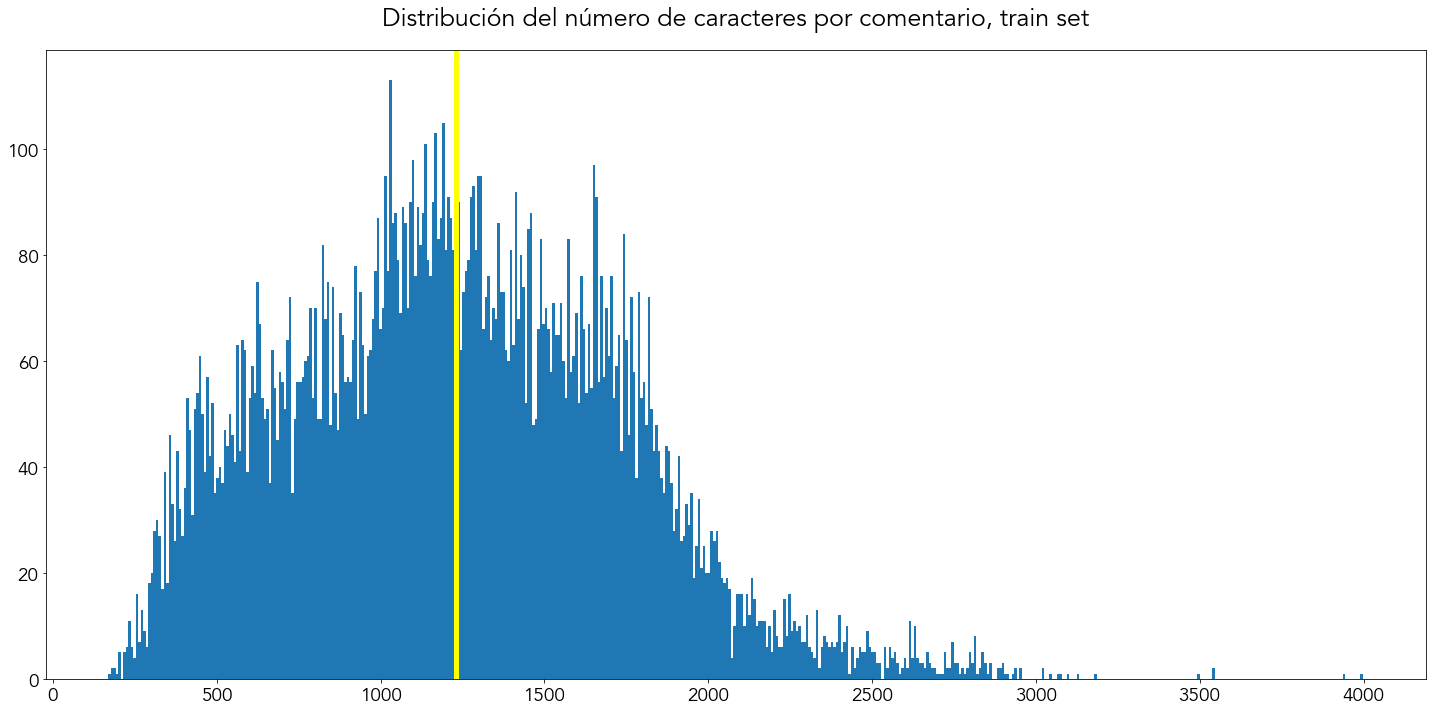

In [19]:
plt.figure(figsize=(20, 10))
plt.hist(avg_char, bins=500)
plt.title('Distribución del número de caracteres por comentario, train set')
plt.axvline(np.average(avg_char), color='yellow', linewidth=5)
plt.tight_layout()
#plt.savefig('media/char_hist_train.pdf')


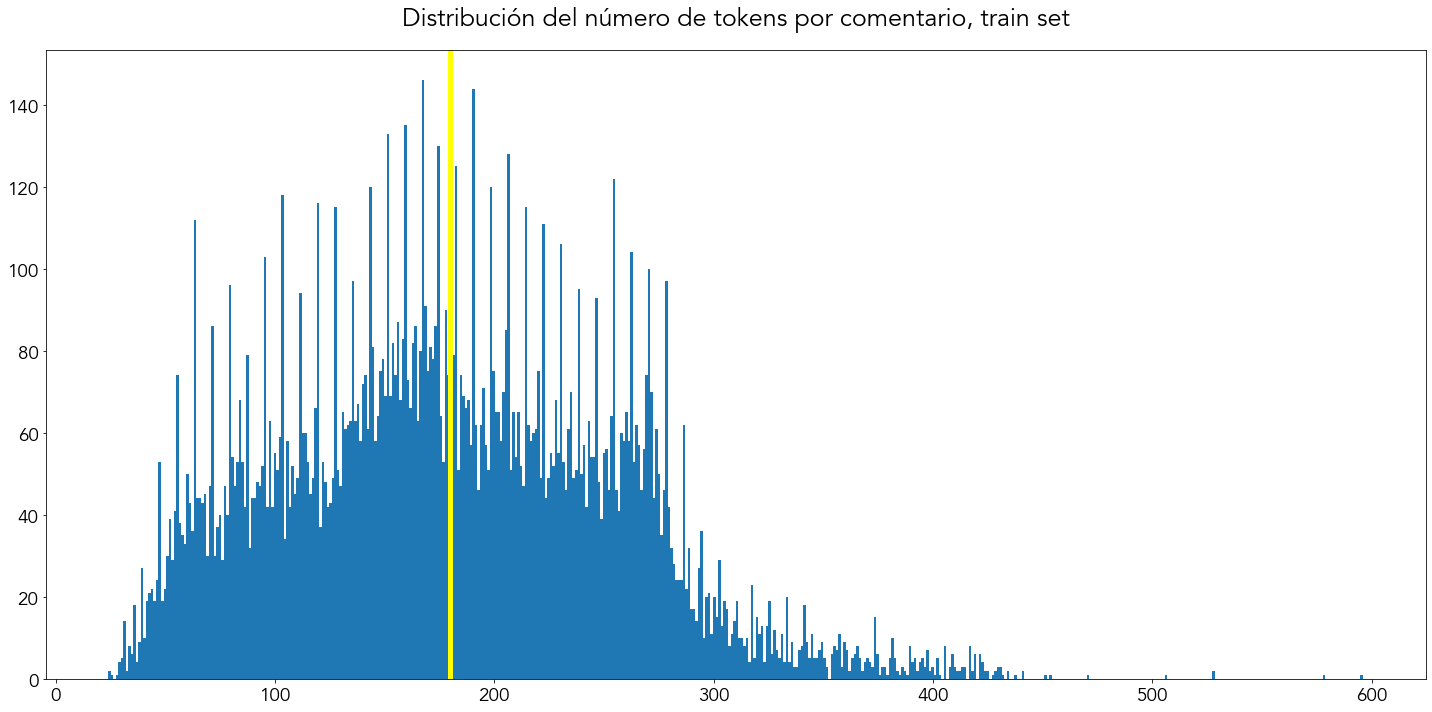

In [20]:
plt.figure(figsize=(20, 10))
plt.hist(avg_tokens, bins=500)
plt.title('Distribución del número de tokens por comentario, train set')
plt.axvline(np.average(avg_tokens), color='yellow', linewidth=5)
plt.tight_layout()
#plt.savefig('media/tokens_hist_train.pdf')

## TEST DATA 

In [18]:
comments = open(DATA_TEST, 'rb').readlines()

In [19]:
def split_tab(comment):
    return comment.decode(encoding='utf-8')

In [20]:
comments_clean = list(map(split_tab, comments))

In [21]:
comments_clean = ' '.join(comments_clean)

In [22]:
print(f'Length of text: {len(comments_clean)} characters')

Length of text: 18258642 characters


In [23]:
sentences = comments_clean.split(' \n ')

In [24]:
avg_char = list(map(len, sentences))

In [25]:
print('Average no of caracters per comment: {}'.format(np.average(avg_char)))

Average no of caracters per comment: 1261.2739925218114


In [26]:
def len_tokens(com):
    a = com.split(' ')
    return len(a)

In [27]:
avg_tokens = list(map(len_tokens, sentences))

In [28]:
print('Average no of tokens per comment: {}'.format(np.average(avg_tokens)))

Average no of tokens per comment: 184.29171859853207


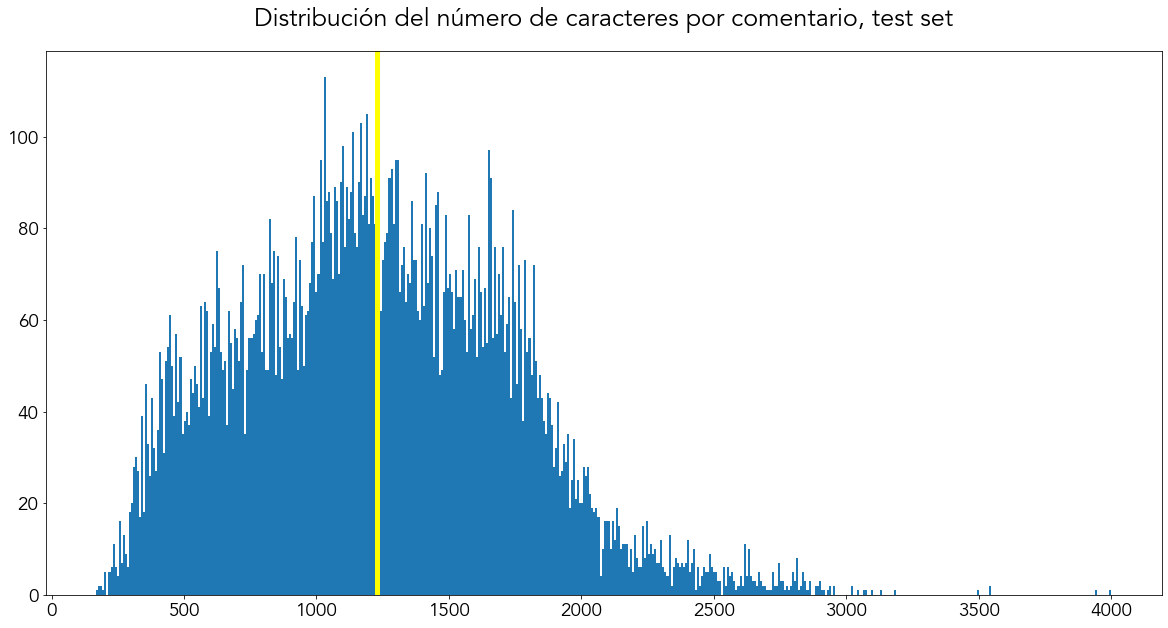

In [17]:
plt.figure(figsize=(20, 10))
plt.hist(avg_char, bins=500)
plt.title('Distribución del número de caracteres por comentario, test set')
plt.axvline(np.average(avg_char), color='yellow', linewidth=5)
# plt.tight_layout()
#plt.savefig('media/char_hist_test.pdf')
plt.show()

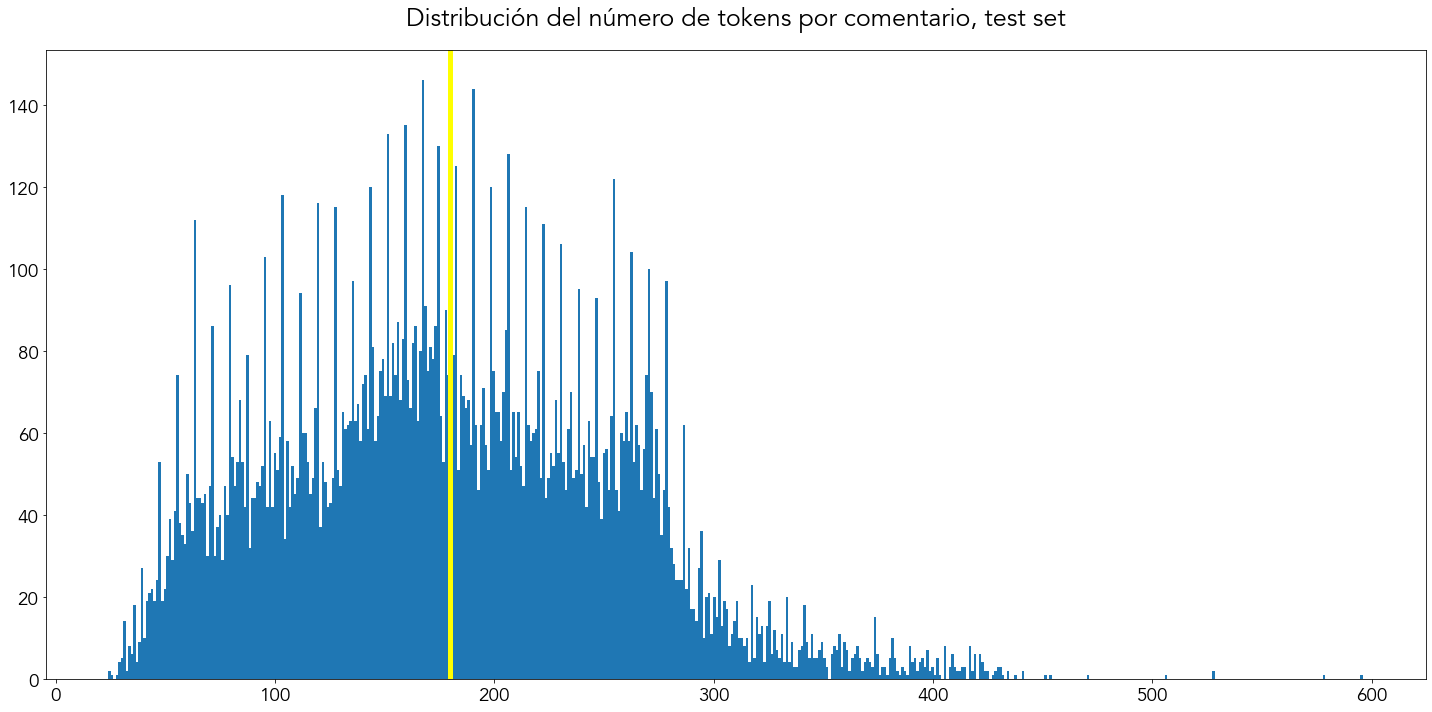

In [16]:
plt.figure(figsize=(20, 10))
plt.hist(avg_tokens, bins=500)
plt.title('Distribución del número de tokens por comentario, test set')
plt.axvline(np.average(avg_tokens), color='yellow', linewidth=5)
plt.tight_layout()
plt.show()
# plt.savefig('media/tokens_hist_test.pdf')

## MTSamples.csv dataset

In [4]:
import pandas as pd

In [5]:
MTSAMPLES = '../data/mtsamples.csv'

In [6]:
data = pd.read_csv(MTSAMPLES, index_col=0)

In [7]:
data.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [8]:

med_text = data.transcription

In [9]:
med_text[0]

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

In [10]:
med_text[4]

'1.  The left ventricular cavity size and wall thickness appear normal.  The wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of 70% to 75%.  There is near-cavity obliteration seen.  There also appears to be increased left ventricular outflow tract gradient at the mid cavity level consistent with hyperdynamic left ventricular systolic function.  There is abnormal left ventricular relaxation pattern seen as well as elevated left atrial pressures seen by Doppler examination.,2.  The left atrium appears mildly dilated.,3.  The right atrium and right ventricle appear normal.,4.  The aortic root appears normal.,5.  The aortic valve appears calcified with mild aortic valve stenosis, calculated aortic valve area is 1.3 cm square with a maximum instantaneous gradient of 34 and a mean gradient of 19 mm.,6.  There is mitral annular calcification extending to leaflets and supportive structures with thickening of mitral valve leaflets with mi

## REGEX PROCESSING

Remove capital letters surrounded by commas and semicolons

In [173]:
def regex_processing(text):
    # Remove capital letters surrounded by 0 or more `,` and a colon, i.e. the titles
    no_caps = re.sub(r',*([A-Z\s]+):', '', text)

    # Remove weirdly positioned commas. Find commas that dont have any letter before and some space after them.
    weird_commas = re.sub(r'(?<!\w),\s+', '', no_caps)
    
    # Remove commas that dont have spaces around them. (Commas should always have a trailing space after them)
    more_commas = re.sub(r'(?<!\s),(?!\s)', ' ', weird_commas)

    # Remove digits adyacent to dots or commas, as in enumerated lists.
    no_digits = re.sub(r'[\.,]*\d[\.,]+', ' ', more_commas)

    # Remove any other commas left behind the process. Particularly these cases: Hello. ,How are you?
    trailing_commas = re.sub(r'\s,(?=[A-Z])', '', no_digits)

    # Substitute any number of spaces for 1 single space.
    no_double_spaces = re.sub(r'\s+', ' ', trailing_commas)

    # Remove dots not surrounded by spaces, as in the third step.
    final_text = re.sub(r'(?<!\s)\.(?!\s)', '. ', no_double_spaces)

    # Finally, strip the text from any trailing commas or white spaces.
    # The result is hopefully a clean version of the text, ready to be tokenized
    # and passed to the models.
    return final_text.strip(', ')



In [174]:
i = 2
print(med_text[i])
print()
print(regex_processing(med_text[i]))

HISTORY OF PRESENT ILLNESS: , I have seen ABC today.  He is a very pleasant gentleman who is 42 years old, 344 pounds.  He is 5'9".  He has a BMI of 51.  He has been overweight for ten years since the age of 33, at his highest he was 358 pounds, at his lowest 260.  He is pursuing surgical attempts of weight loss to feel good, get healthy, and begin to exercise again.  He wants to be able to exercise and play volleyball.  Physically, he is sluggish.  He gets tired quickly.  He does not go out often.  When he loses weight he always regains it and he gains back more than he lost.  His biggest weight loss is 25 pounds and it was three months before he gained it back.  He did six months of not drinking alcohol and not taking in many calories.  He has been on multiple commercial weight loss programs including Slim Fast for one month one year ago and Atkin's Diet for one month two years ago.,PAST MEDICAL HISTORY: , He has difficulty climbing stairs, difficulty with airline seats, tying shoes,